# <font color ="teal"> Zehira Heights</font>
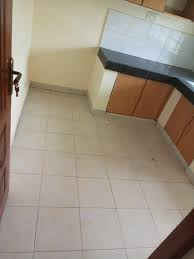

In [5]:
# there is a library called OS, read more about it, it assist you in getting files from the operating system
import os
os.listdir() # it helps you see what files are in that folder ( it is similar tp dir command on the terminal)
!dir #you can unhash this and see that they are similar --

LIST\ COMPREHENSION.ipynb
May\ 2020\ Zehira\ Heights\ Rent\ Collection\ Report.xlsx
New\ Assignment.ipynb
Pandas(Extended\ analysis).ipynb
Statistical\ Distributions.ipynb


In [26]:
# one advantage of using OS is that you can loop through the files and impose conditions(we shall visit this later)
import pandas as pd
for i in os.listdir():
    #print(i)
    if "xlsx" in i:
        df = pd.read_excel(i,skiprows=2)
    else:
        print(f"Cant read your file:{i}")
df.head()

Cant read your file:LIST COMPREHENSION.ipynb
Cant read your file:New Assignment.ipynb
Cant read your file:Statistical Distributions.ipynb
Cant read your file:Pandas(Extended analysis).ipynb
Cant read your file:.ipynb_checkpoints


,HSE,TENANT,BAL B/F,RENT,WATER BILL,Unnamed: 5,Scharge,DEPOSIT,DEDUCTIONS,10%\nPENALTY,PAYABLE,PAID,BAL C/F,Unnamed: 13
0,1A,ALFRED JOE,0.0,0.0,(106-101),500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1B,OLIVA ONDEDE,0.0,21000.0,(91-87),600.0,250.0,0.0,0.0,0.0,21850.0,21850.0,0.0,NaN
2,2A,FIDELIS NYAMBURA,0.0,20000.0,(250-240),1000.0,1000.0,0.0,0.0,0.0,22000.0,22000.0,0.0,NaN
3,2B,PAUL MUCHOKA,200.0,22000.0,(209-202),1050.0,250.0,0.0,0.0,0.0,23100.0,15000.0,8100.0,NaN
4,2C,JAMES KINYANJUI,0.0,20000.0,(216-207),1200.0,1000.0,0.0,0.0,0.0,22200.0,22200.0,0.0,NaN


In [27]:
#What was the total rent collected?
df["PAID"].sum()

163550.0

In [28]:
# suppose the agent is paid 5% of total rent paid, how much did the agent get paid

df["commission"] = (df["PAID"]*0.05)
#df.head(12)
df["commission"].sum()


8177.5

In [29]:
# how much did the agent get paid per each house ( multiply Rent per house  by the percentage)
df[["HSE","commission"]].head(12)

,HSE,commission
0,1A,0.0
1,1B,1092.5
2,2A,1100.0
3,2B,750.0
4,2C,1110.0
5,3A,0.0
6,3B,1105.0
7,3C,670.0
8,4A,1150.0
9,4B,0.0


In [30]:
# which house paid the agent the most?

for i in zip(df.HSE,df.commission):
    #print(i)
    if i[1] == max(df.commission):
        print('The house that paid the agent the most is' ,i[0])


    

The house that paid the agent the most is 4C


In [31]:
# How many tenants are there?
df.TENANT.value_counts()

#print('you thought i would forget value count hehhehheheheeeeeeeeeeeeeee')

JAMES KINYANJUI     1
NJERI HINGA         1
MARY MBUGUA         1
OLIVA ONDEDE        1
PAUL MUCHOKA        1
FIDELIS NYAMBURA    1
BENARD MBURU        1
MOLLY GONE          1
JULIUS KIMANI       1
KEN AWESOME         1
FRANK               1
ALFRED JOE          1
Name: TENANT, dtype: int64

In [32]:
df.columns

Index(['HSE', 'TENANT', 'BAL B/F', 'RENT', 'WATER BILL', 'Unnamed: 5',
       'Scharge', 'DEPOSIT', 'DEDUCTIONS', '10%\nPENALTY', 'PAYABLE', 'PAID',
       'BAL C/F', 'Unnamed: 13', 'commission'],
      dtype='object')

In [33]:
df.Scharge

0        0.0
1      250.0
2     1000.0
3      250.0
4     1000.0
5      250.0
6     1000.0
7      250.0
8      250.0
9     1000.0
10       0.0
11       0.0
12       NaN
13       NaN
14       NaN
Name: Scharge, dtype: float64

In [34]:
# How many units paid a service charge of Ksh 250

for i in zip(df.HSE,df.Scharge):
    #print(i)
    if i[1]==250:
        print((i[0]), 'pays 250 serice charge')
    

1B pays 250 serice charge
2B pays 250 serice charge
3A pays 250 serice charge
3C pays 250 serice charge
4A pays 250 serice charge


In [35]:
# create a new variable "variance" where variance = rentpayable - rentpaid

df["variance"] = (df["PAYABLE"]-df["PAID"])

df.variance

0         0.0
1         0.0
2         0.0
3      8100.0
4         0.0
5     46902.0
6         0.0
7      2000.0
8       500.0
9     21100.0
10     -430.0
11        0.0
12        NaN
13        NaN
14        NaN
Name: variance, dtype: float64

In [36]:
# identify tenants that paid fully(variance =0)

for i in zip(df.HSE,df.variance):
    #print(i)
    if i[1]==0:
        print( (i[0]),'paid rent in full')

1A paid rent in full
1B paid rent in full
2A paid rent in full
2C paid rent in full
3B paid rent in full
5B paid rent in full


In [37]:
# identify tenants who overpaid

for i in zip(df.HSE,df.variance):
    #print(i)
    if i[1]<0:
        print( (i[0]),'overpaid')

4C overpaid


In [38]:
# among those that underpaid, sort the dataframe so that you can identify tenants who underpaid by the largest margin

for i in zip(df.HSE,df.variance):
    #print(i)
    if i[1]>0:
        print(i)
        

('2B', 8100.0)
('3A', 46902.0)
('3C', 2000.0)
('4A', 500.0)
('4B', 21100.0)


In [39]:
df[df.variance>0].sort_values("variance", ascending = False)
  

,HSE,TENANT,BAL B/F,RENT,WATER BILL,Unnamed: 5,Scharge,DEPOSIT,DEDUCTIONS,10%\nPENALTY,PAYABLE,PAID,BAL C/F,Unnamed: 13,commission,variance
5,3A,JULIUS KIMANI,24302.0,21000.0,(207-198),1350.0,250.0,0.0,0.0,0.0,46902.0,0.0,46902.0,NaN,0.0,46902.0
9,4B,NJERI HINGA,0.0,20000.0,(56-55),100.0,1000.0,0.0,0.0,0.0,21100.0,0.0,21100.0,NaN,0.0,21100.0
3,2B,PAUL MUCHOKA,200.0,22000.0,(209-202),1050.0,250.0,0.0,0.0,0.0,23100.0,15000.0,8100.0,NaN,750.0,8100.0
7,3C,BENARD MBURU,2000.0,11500.0,(281-270),1650.0,250.0,0.0,0.0,0.0,15400.0,13400.0,2000.0,NaN,670.0,2000.0
8,4A,FRANK,0.0,22500.0,(184-179),750.0,250.0,0.0,0.0,0.0,23500.0,23000.0,500.0,NaN,1150.0,500.0


In [40]:
# print top 2 underpayers

(df[df.variance>0].sort_values("variance", ascending = False)).head(2)

,HSE,TENANT,BAL B/F,RENT,WATER BILL,Unnamed: 5,Scharge,DEPOSIT,DEDUCTIONS,10%\nPENALTY,PAYABLE,PAID,BAL C/F,Unnamed: 13,commission,variance
5,3A,JULIUS KIMANI,24302.0,21000.0,(207-198),1350.0,250.0,0.0,0.0,0.0,46902.0,0.0,46902.0,NaN,0.0,46902.0
9,4B,NJERI HINGA,0.0,20000.0,(56-55),100.0,1000.0,0.0,0.0,0.0,21100.0,0.0,21100.0,NaN,0.0,21100.0


In [41]:
# which floor has the most underpayers

(df[df.variance>0].sort_values("variance", ascending = False)).head(14)

,HSE,TENANT,BAL B/F,RENT,WATER BILL,Unnamed: 5,Scharge,DEPOSIT,DEDUCTIONS,10%\nPENALTY,PAYABLE,PAID,BAL C/F,Unnamed: 13,commission,variance
5,3A,JULIUS KIMANI,24302.0,21000.0,(207-198),1350.0,250.0,0.0,0.0,0.0,46902.0,0.0,46902.0,NaN,0.0,46902.0
9,4B,NJERI HINGA,0.0,20000.0,(56-55),100.0,1000.0,0.0,0.0,0.0,21100.0,0.0,21100.0,NaN,0.0,21100.0
3,2B,PAUL MUCHOKA,200.0,22000.0,(209-202),1050.0,250.0,0.0,0.0,0.0,23100.0,15000.0,8100.0,NaN,750.0,8100.0
7,3C,BENARD MBURU,2000.0,11500.0,(281-270),1650.0,250.0,0.0,0.0,0.0,15400.0,13400.0,2000.0,NaN,670.0,2000.0
8,4A,FRANK,0.0,22500.0,(184-179),750.0,250.0,0.0,0.0,0.0,23500.0,23000.0,500.0,NaN,1150.0,500.0


In [42]:
# which floor has the most overpayers
(df[df.variance<0].sort_values("variance", ascending = False)).head(2)

,HSE,TENANT,BAL B/F,RENT,WATER BILL,Unnamed: 5,Scharge,DEPOSIT,DEDUCTIONS,10%\nPENALTY,PAYABLE,PAID,BAL C/F,Unnamed: 13,commission,variance
10,4C,MARY MBUGUA,-480.0,23000.0,(139-132),1050.0,0.0,0.0,0.0,0.0,23570.0,24000.0,-430.0,NaN,1200.0,-430.0


# <font color ="red"> Slightly Advanced Questions</font>

In [43]:
#example of text splits

table = pd.DataFrame(["John Kamau","Njau Ngaga","Donald Trump"],columns =["Name"])
print(table.head())
table["First name"] = [i.split()[0] for i in table.Name]
table["Second name"] = [i.split()[1] for i in table.Name]
table.head()

           Name
0    John Kamau
1    Njau Ngaga
2  Donald Trump


,Name,First name,Second name
0,John Kamau,John,Kamau
1,Njau Ngaga,Njau,Ngaga
2,Donald Trump,Donald,Trump


In [44]:
table = df

print(table.head())

table["First name"] = [i.split()[0] for i in table.TENANT]
table["Second name"] = [i.split()[1] for i in table.TENANT]
table.head()




  HSE            TENANT  BAL B/F     RENT    WATER BILL  Unnamed: 5  Scharge  \
0  1A        ALFRED JOE      0.0      0.0  (106-101)          500.0      0.0   
1  1B      OLIVA ONDEDE      0.0  21000.0      (91-87)        600.0    250.0   
2  2A  FIDELIS NYAMBURA      0.0  20000.0  (250-240)         1000.0   1000.0   
3  2B      PAUL MUCHOKA    200.0  22000.0     (209-202)      1050.0    250.0   
4  2C   JAMES KINYANJUI      0.0  20000.0  (216-207)         1200.0   1000.0   

   DEPOSIT  DEDUCTIONS  10%\nPENALTY  PAYABLE     PAID  BAL C/F  Unnamed: 13  \
0      0.0         0.0           0.0      0.0      0.0      0.0          NaN   
1      0.0         0.0           0.0  21850.0  21850.0      0.0          NaN   
2      0.0         0.0           0.0  22000.0  22000.0      0.0          NaN   
3      0.0         0.0           0.0  23100.0  15000.0   8100.0          NaN   
4      0.0         0.0           0.0  22200.0  22200.0      0.0          NaN   

   commission  variance  
0         0.

AttributeError: 'float' object has no attribute 'split'

In [45]:
# create two columns one called "first name" the other "second name"
# split the tenant name into 2 and add the names to the appropriate column (use a for loop as you have learned)

#df["First name"] = [i.split()[0] for i in df.TENANT]
#df["Second name"] = [i.split()[1] for i in df.TENANT]
df.head()

dx = df[["HSE","PAID"]]
dx = dx.head(12)
empty = []

for i in dx.HSE:
    #print(i)
    j = str(i)[0]
    #print(j)
    empty.append(j)
dx["floor"] = empty
dx.head()

,HSE,PAID,floor
0,1A,0.0,1
1,1B,21850.0,1
2,2A,22000.0,2
3,2B,15000.0,2
4,2C,22200.0,2


In [46]:
def meaner(x):
    return sum(x)/len(x)
meaner([23,24])

23.5

In [47]:
dx.groupby("floor").sum()


,PAID
floor,
1,21850.0
2,59200.0
3,35500.0
4,47000.0
5,0.0


In [48]:
dx.groupby(["floor","HSE"]).agg([meaner,"median","min"])

PAID                  
            meaner   median      min
floor HSE                           
1     1A       0.0      0.0      0.0
      1B   21850.0  21850.0  21850.0
2     2A   22000.0  22000.0  22000.0
      2B   15000.0  15000.0  15000.0
      2C   22200.0  22200.0  22200.0
3     3A       0.0      0.0      0.0
      3B   22100.0  22100.0  22100.0
      3C   13400.0  13400.0  13400.0
4     4A   23000.0  23000.0  23000.0
      4B       0.0      0.0      0.0
      4C   24000.0  24000.0  24000.0
5     5B       0.0      0.0      0.0

In [ ]:
# Example 2 ( Group-BYS)
table = pd.DataFrame(["1A","1B","2A","2B"],columns =["HouseName"])
table["rent"] = [200,300,100,200]
print(table.head())
table["floor"] = [i[0] for  i in table.HouseName]
print(table.head())
table["floor"] = ["1st floor" if int(i)==1 else "second floor" for i in table.floor]
print(table.head())

print("Cumulative sum per floor")
print("$"*30)
print(table.groupby("floor").sum())
print("$"*30)

In [ ]:
df.head(15)

In [ ]:
#How many units did each house pay? use the waterbill column
# what was the total units consumed by each floor? us a groupby command (learn more about it)

# <font color ="cyan">Visualizations</font>

In [ ]:
df.head()
# create a histogram of the PAYABLE COLUMN
# label it accordingly

import numpy as np
hist_plot = df['PAYABLE'].hist(bins=12)
hist_plot.set_title("RENT PAYABLE")
hist_plot.set_xlabel("RENT")
hist_plot.set_ylabel("TENANTS")

In [ ]:
# how many tenants pay the lowest rent (read from the histogram)
2

In [ ]:
# create a correlation heatmap between variance column and service charge ( is there a correlation?)i
import seaborn as sns
sns.heatmap(df[['variance' , 'Scharge']].corr())

In [1]:
colors = ["red","yellow","green","grey","turquoise"]

def njau(x):
    empty = []
    for i in x:
        if len(i)<4:
            empty.append("small")
        elif len(i)<5:
            empty.append("Mid")
        else:
            empty.append("Long")
    return empty
njau(colors)

['small', 'Long', 'Long', 'Mid', 'Long']

In [ ]:
#empty = [njau wants i  to be "small" if len(i)<4 else njau wants i to be "mid" if len(i)<5 else "Long" for i in colors]
empty = ["small" if len(i)<4 else  "mid" if len(i)<5 else "Long" for i in colors]
empty